In [13]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
%matplotlib inline 


In [14]:
#load data for 1 recording and 2 recording
os.chdir('/home/melissa/RESULTS/EF1_ALPHA/1_REC')
rem_1_rec = pd.read_csv('R_1_rec.csv')
nrem_1_rec = pd.read_csv('N_1_rec.csv')
wake_1_rec = pd.read_csv('W_1_rec.csv')

os.chdir('/home/melissa/RESULTS/EF1_ALPHA/2_REC')
rem_2_rec = pd.read_csv('R_2_rec.csv')
nrem_2_rec = pd.read_csv('N_2_rec.csv')
wake_2_rec = pd.read_csv('W_2_rec.csv')

In [120]:
os.chdir('/home/melissa/RESULTS/EF1_ALPHA/')
rem_test = pd.read_csv('R_1_rec.csv')

In [126]:
rem_test[rem_test['Animal_ID'] == '210706A']

,Unnamed: 0,Animal_ID,Headstage,Channel,Brainstate,Power,Frequency


In [15]:
rem = pd.concat([rem_1_rec, rem_2_rec], axis = 0) 
nrem = pd.concat([nrem_1_rec, nrem_2_rec], axis = 0) 
wake = pd.concat([wake_1_rec, wake_2_rec], axis = 0) 

In [274]:
os.chdir('/home/melissa/PROJECT_DIRECTORIES/ef1_alpha_analysis')
%run ef1_alpha_properties.py

In [118]:
genotypes['wildtypes']

['210422D',
 '210423D',
 '210705C',
 '210706C',
 '191216C',
 '191125A',
 '191126A',
 '191107A',
 '191104B',
 '191108A',
 '210422B',
 '210423B']

In [16]:
def build_genotype_df(results_dataframe, mutant_list):
    '''build_genotype_df(results_dataframe, mutant_list, gender_list, animal_line) takes dataframe and adds a column with genotypes to the dataframe'''
    int_mutant_list = [ID for ID in mutant_list]
    genotype = []
    
    def check_availability(element, variables: iter):
        return element in variables
    
    animal_numbers = results_dataframe['Animal_ID'] 
    animal_numbers = list(animal_numbers)
    for animal in animal_numbers:
        if check_availability(animal, int_mutant_list):
            genotype.append('EF1')
        else:
            genotype.append('WT')
    
    genotype_df = pd.DataFrame({'Genotype': genotype})
    
    final_dataframe = results_dataframe.join(genotype_df)
    
    return final_dataframe



In [17]:
os.chdir('/home/melissa/PROJECT_DIRECTORIES/ef1_alpha_analysis')
%run ef1_alpha_properties.py

<Figure size 432x288 with 0 Axes>

In [18]:
rem_df = build_genotype_df(rem, genotypes['ef1_alpha_knockouts'])
nrem_df = build_genotype_df(nrem, genotypes['ef1_alpha_knockouts'])
wake_df = build_genotype_df(wake, genotypes['ef1_alpha_knockouts'])

In [67]:
channel_2_wake = wake_df[wake_df['Channel'] == 2]
channel_18_wake = wake_df[wake_df['Channel'] == 18]
channel_34_wake = wake_df[wake_df['Channel'] == 34]
channel_50_wake = wake_df[wake_df['Channel'] == 50]

In [72]:
channel_2_wake

,Unnamed: 0,Animal_ID,Headstage,Channel,Brainstate,Power,Frequency,Genotype
0,0,191107A,A,2,W,3.588109e+01,0.0,WT
1,1,191107A,A,2,W,4.497957e+01,0.2,WT
2,2,191107A,A,2,W,1.711651e+02,0.4,WT
3,3,191107A,A,2,W,6.396129e+02,0.6,WT
4,4,191107A,A,2,W,1.705861e+03,0.8,WT
...,...,...,...,...,...,...,...,...
32508,32508,191216A_1,A_1,2,W,8.900040e-19,499.2,EF1
32509,32509,191216A_1,A_1,2,W,8.894384e-19,499.4,EF1
32510,32510,191216A_1,A_1,2,W,8.890344e-19,499.6,EF1
32511,32511,191216A_1,A_1,2,W,8.887918e-19,499.8,EF1


In [68]:
channel_2_nrem = nrem_df[nrem_df['Channel'] == 2]
channel_18_nrem = nrem_df[nrem_df['Channel'] == 18]
channel_34_nrem = nrem_df[nrem_df['Channel'] == 34]
channel_50_nrem = nrem_df[nrem_df['Channel'] == 50]

In [73]:
rem['chan']

,Unnamed: 0,Animal_ID,Headstage,Channel,Brainstate,Power,Frequency,Genotype
0,0,191107A,A,2,N,2.771247e+01,0.0,WT
1,1,191107A,A,2,N,4.865016e+01,0.2,WT
2,2,191107A,A,2,N,1.372582e+02,0.4,WT
3,3,191107A,A,2,N,4.395086e+02,0.6,WT
4,4,191107A,A,2,N,8.794228e+02,0.8,WT
...,...,...,...,...,...,...,...,...
32508,32508,191216A_1,A_1,2,N,9.403220e-19,499.2,EF1
32509,32509,191216A_1,A_1,2,N,9.398577e-19,499.4,EF1
32510,32510,191216A_1,A_1,2,N,9.395261e-19,499.6,EF1
32511,32511,191216A_1,A_1,2,N,9.393271e-19,499.8,EF1


In [69]:
channel_2_rem = rem_df[rem_df['Channel'] == 2]
channel_18_rem = rem_df[rem_df['Channel'] == 18]
channel_34_rem = rem_df[rem_df['Channel'] == 34]
channel_50_rem = rem_df[rem_df['Channel'] == 50]

In [83]:
channel_50_rem[channel_50_rem['Animal_ID'] == '210422D']

,Unnamed: 0,Animal_ID,Headstage,Channel,Brainstate,Power,Frequency,Genotype


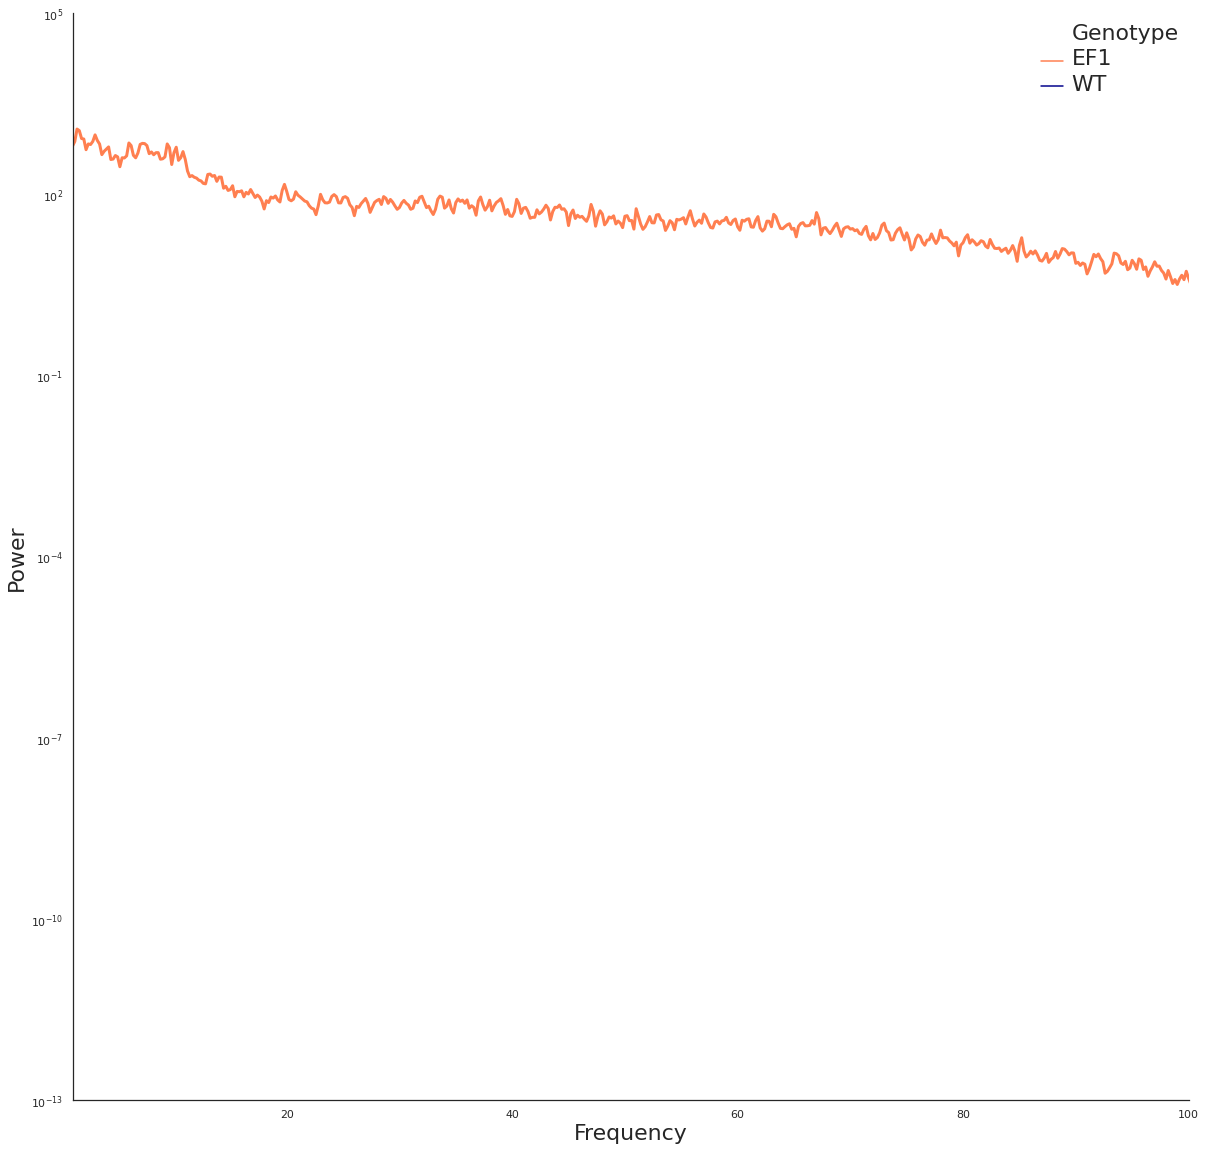

In [80]:
#total power across all channels

sns.set_style("white") 
colors = ['coral', 'darkblue']
hue_order = ['EF1', 'WT']

f.suptitle('REM', fontsize = 36)
line1 = sns.lineplot(x= 'Frequency', y='Power', hue='Genotype', hue_order = hue_order, ci= 95, 
                     data = channel_50_rem, palette= colors, linewidth = 3)
sns.despine()
plt.rc('axes', labelsize = 22)
plt.yscale('log')
plt.xlim(1, 100)
plt.legend(frameon = False)
plt.setp(line1.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(line1.get_legend().get_title(), fontsize='32') # for legend title
plt.ylim(10**-13, 10**5)

os.chdir('/home/melissa/RESULTS/EF1_ALPHA/PLOTS')
plt.savefig('channel_50_rem_psd.jpg')
plt.show()

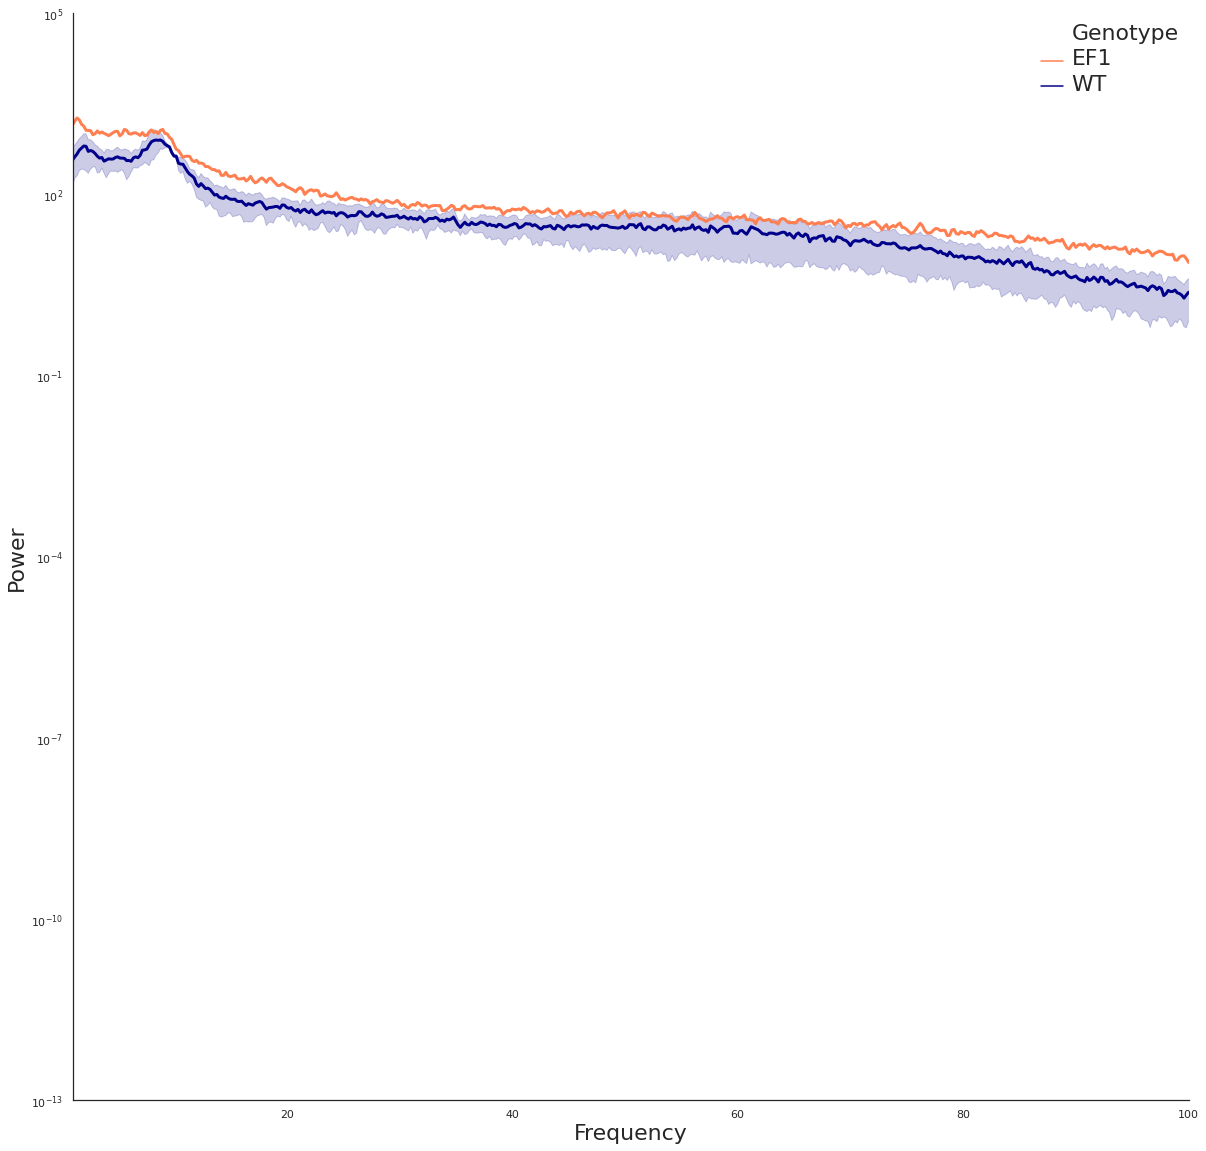

In [78]:
#total power across all channels
sns.set_style("white") #hue='Channel_Number', ci=95
colors = ['coral', 'darkblue']
hue_order = ['EF1', 'WT']

f.suptitle('Non-REM', fontsize = 36)
line1 = sns.lineplot(x= 'Frequency', y='Power', hue='Genotype', hue_order = hue_order, ci= 95, 
                     data = channel_34_nrem, palette= colors, linewidth = 3)
sns.despine()
plt.rc('axes', labelsize = 22)
plt.yscale('log')
plt.xlim(1, 100)
plt.legend(frameon = False)
plt.setp(line1.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(line1.get_legend().get_title(), fontsize='32') # for legend title
plt.ylim(10**-13, 10**5)

os.chdir('/home/melissa/RESULTS/EF1_ALPHA/PLOTS')
plt.savefig('channel_34_nrem_psd.jpg')
plt.show()

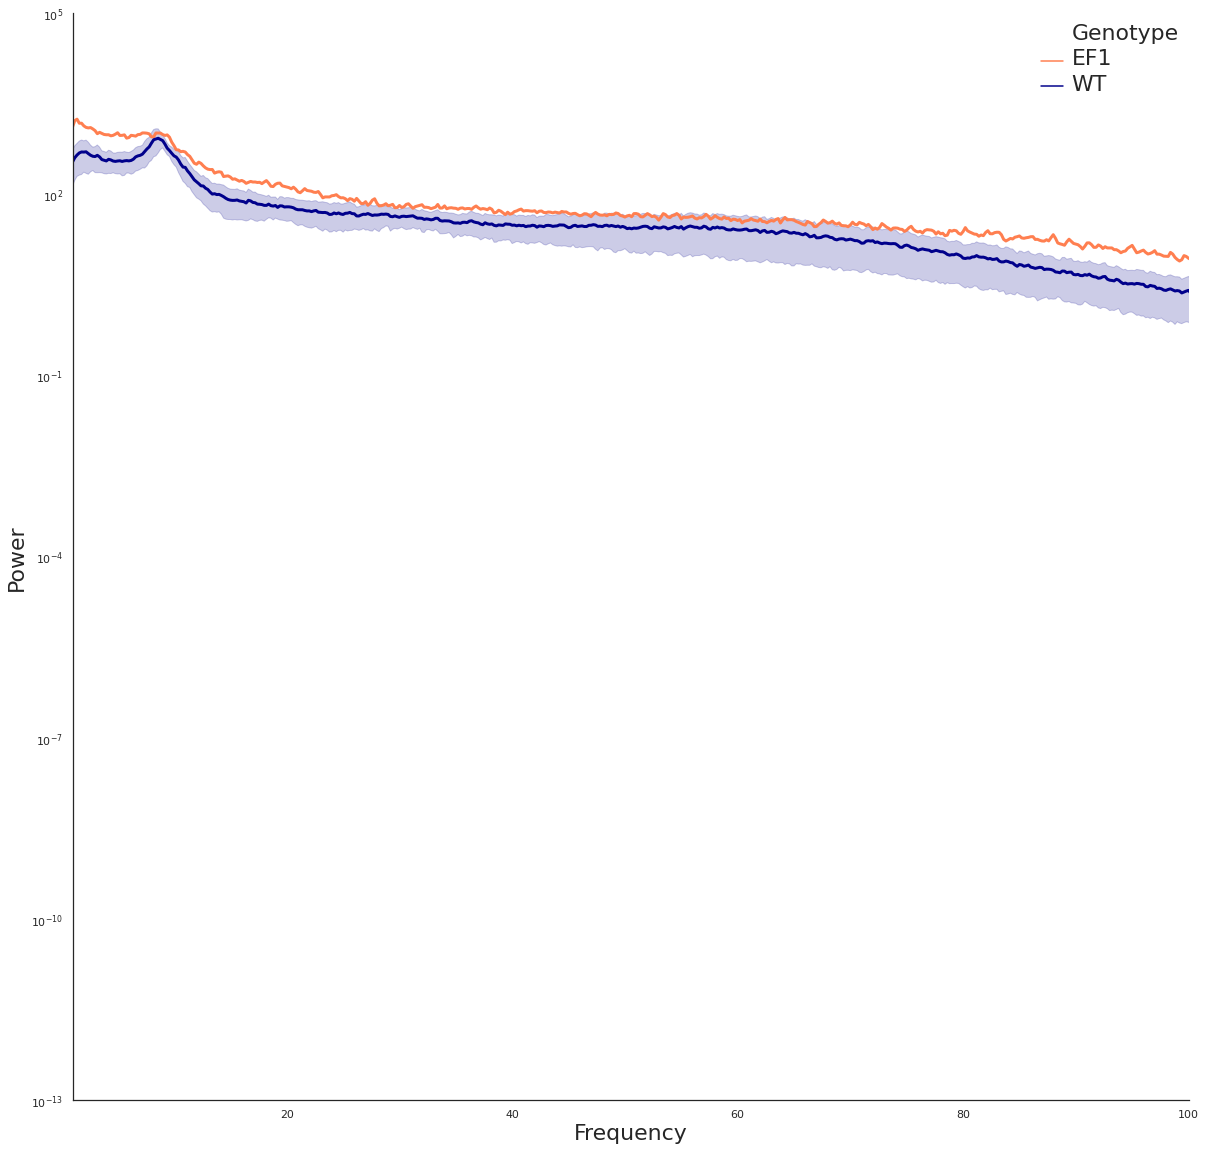

In [79]:
#total power across all channels
sns.set_style("white") #hue='Channel_Number', ci=95
colors = ['coral', 'darkblue']
hue_order = ['EF1', 'WT']

f.suptitle('Wake', fontsize = 36)
line1 = sns.lineplot(x= 'Frequency', y='Power', hue='Genotype', hue_order = hue_order, ci= 95, 
                     data = channel_34_wake, palette= colors, linewidth = 3)
sns.despine()
plt.rc('axes', labelsize = 22)
plt.yscale('log')
plt.xlim(1, 100)
plt.legend(frameon = False)
plt.setp(line1.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(line1.get_legend().get_title(), fontsize='32') # for legend title
plt.ylim(10**-13, 10**5)

os.chdir('/home/melissa/RESULTS/EF1_ALPHA/PLOTS')
plt.savefig('channel_34_wake_psd.jpg',  bbox_inches = 'tight')
plt.show()

In [24]:
#plot per animal and per channel 
EF1_rem = rem_df[rem_df['Genotype'] == 'EF1']
WT_rem = rem_df[rem_df['Genotype'] == 'WT']
EF1_nrem = nrem_df[nrem_df['Genotype'] == 'EF1']
WT_nrem = nrem_df[nrem_df['Genotype'] == 'WT']
EF1_wake = wake_df[wake_df['Genotype'] == 'EF1']
WT_wake = wake_df[wake_df['Genotype'] == 'WT']

In [25]:
#separate by headstages 
A_rem_EF1 = EF1_rem[EF1_rem['Headstage'] == 'A']
A_1_rem_EF1 = EF1_rem[EF1_rem['Headstage'] == 'A_1']
B_rem_EF1 = EF1_rem[EF1_rem['Headstage'] == 'B']
B_1_rem_EF1 = EF1_rem[EF1_rem['Headstage'] == 'B_1']
C_rem_EF1 = EF1_rem[EF1_rem['Headstage'] == 'C']
D_rem_EF1 = EF1_rem[EF1_rem['Headstage'] == 'D']

In [207]:
#separate by headstages 
A_wt = WT_rem[WT_rem['Headstage'] == 'A']
A_1_wt = WT_rem[WT_rem['Headstage'] == 'A_1']
B_wt = WT_rem[WT_rem['Headstage'] == 'B']
B_1_wt = WT_rem[WT_rem['Headstage'] == 'B_1']
C_wt = WT_rem[WT_rem['Headstage'] == 'C']
D_wt = WT_rem[WT_rem['Headstage'] == 'D']

In [199]:
#separate by headstages 
A_wt = WT_nrem[WT_nrem['Headstage'] == 'A']
A_1_wt = WT_nrem[WT_nrem['Headstage'] == 'A_1']
B_wt = WT_nrem[WT_nrem['Headstage'] == 'B']
B_1_wt = WT_nrem[WT_nrem['Headstage'] == 'B_1']
C_wt = WT_nrem[WT_nrem['Headstage'] == 'C']
D_wt = WT_nrem[WT_nrem['Headstage'] == 'D']

In [216]:
#separate by headstages 
A_wt = WT_wake[WT_wake['Headstage'] == 'A']
A_1_wt = WT_wake[WT_wake['Headstage'] == 'A_1']
B_wt = WT_wake[WT_wake['Headstage'] == 'B']
B_1_wt = WT_wake[WT_wake['Headstage'] == 'B_1']
C_wt = WT_wake[WT_wake['Headstage'] == 'C']
D_wt = WT_wake[WT_wake['Headstage'] == 'D']

In [54]:
print(D_rem_EF1)

        Unnamed: 0 Animal_ID Headstage  Channel Brainstate         Power  \
100040      100040   210706D         D       50          R  1.114691e+01   
100041      100041   210706D         D       50          R  9.828298e+01   
100042      100042   210706D         D       50          R  2.585840e+02   
100043      100043   210706D         D       50          R  3.492910e+02   
100044      100044   210706D         D       50          R  4.952765e+02   
...            ...       ...       ...      ...        ...           ...   
110039      110039   210706D         D       57          R  1.654665e-18   
110040      110040   210706D         D       57          R  1.653882e-18   
110041      110041   210706D         D       57          R  1.653323e-18   
110042      110042   210706D         D       57          R  1.652987e-18   
110043      110043   210706D         D       57          R  8.264376e-19   

        Frequency Genotype  
100040        0.0      EF1  
100041        0.2      EF1  


In [26]:
my_pal = ['000000', '29AF8C', '97BE49', '3D9CCC']#, '7C60C6', 'D58C2E', 'C9492C', '44546A']

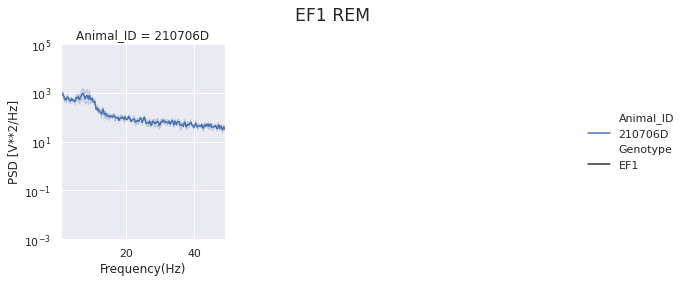

In [55]:
#plotting by headstage
data_to_plot = D_rem_EF1
sns.set( rc = {'figure.figsize' : ( 20, 20 ), 
               'axes.labelsize' : 12 })
per_animal_plot = sns.relplot(data= data_to_plot, x= 'Frequency', y='Power', style='Genotype', 
                              hue= 'Animal_ID', col='Animal_ID', col_wrap = 3, height=4, aspect=.7, kind="line")#,
                             #palette = my_pal)
per_animal_plot.fig.suptitle("EF1 REM" ,
               fontsize = 'x-large')#, 
               #fontweight = 'bold' )
# Adjust subplots so that titles don't overlap
per_animal_plot.fig.subplots_adjust( top = 0.85 )
sns.despine()
plt.yscale('log')
plt.xlim(1, 49)
plt.ylim(10**-3, 10**5)
per_animal_plot.set_axis_labels("Frequency(Hz)", "PSD [V**2/Hz]")
os.chdir('/home/melissa/RESULTS/EF1_ALPHA/PLOTS/EF1_per_headstage')
plt.savefig('D_rem_EF1.jpg', bbox_inches = 'tight')

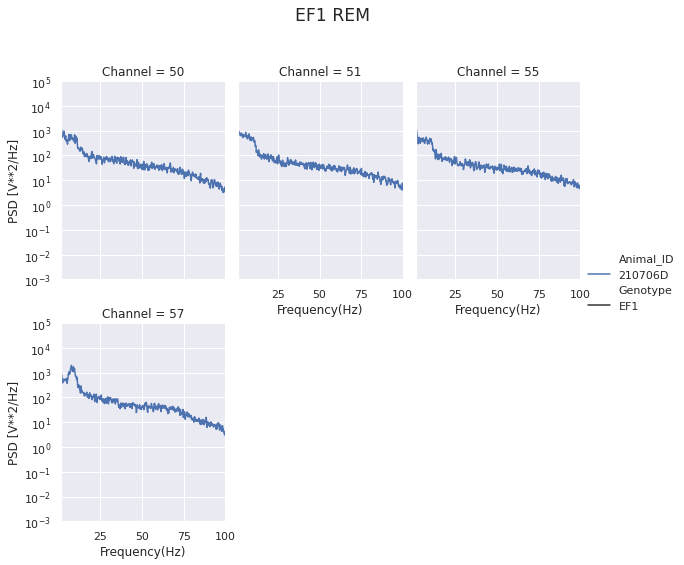

In [56]:
#plotting by channel in animal headstages
data_to_plot = D_rem_EF1[D_rem_EF1['Animal_ID'] == '210706D']
sns.set_style("white")
sns.set( rc = {'figure.figsize' : ( 20, 20 ), 
               'axes.labelsize' : 12 })
per_animal_plot = sns.relplot(data= data_to_plot, x= 'Frequency', y='Power', style='Genotype', 
                              hue= 'Animal_ID', col='Channel', col_wrap = 3, height=4, aspect=.7, kind="line")#,

per_animal_plot.fig.suptitle("EF1 REM" ,
               fontsize = 'x-large')#, 
               #fontweight = 'bold' )
# Adjust subplots so that titles don't overlap
per_animal_plot.fig.subplots_adjust( top = 0.85 )
sns.despine()
plt.yscale('log')
plt.xlim(1, 100)
plt.ylim(10**-3, 10**5)
per_animal_plot.set_axis_labels("Frequency(Hz)", "PSD [V**2/Hz]")
os.chdir('/home/melissa/RESULTS/EF1_ALPHA/PLOTS/EF1_per_headstage')
plt.savefig('D_rem_210706D_EF1.jpg', bbox_inches = 'tight')